In [3]:
from gensim.models import doc2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn

import load_articles

//anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [4]:
all_data = load_articles.read_from_database()

Database: connecting to"./data/articles_database.db"... connected.
Database: closing connection...  closed.
4479 documents loaded from database.
Dataset loaded; 49934 unique words over 4479 documents.


In [161]:
class Experiment():
    def __init__(self, categorylist=None, trainingdata=None, model=None, pcavectors=None, template=None):
        self.categorylist = template.categorylist if template else categorylist
        self.trainingdata = template.trainingdata if template else trainingdata
        self.model        = template.model        if template else model
        self.pca_vectors  = template.pca_vectors  if template else pcavectors
        
    def add_model(self, model=None, size=100, iterations=20):
        if not model:
            print("Training model... ", end=" ")
            model = doc2vec.Doc2Vec(self.trainingdata.docobjects, size=size, window=8,
                                     min_count=5, workers=4, iter=iterations)
            model.save("datamodel")
            print("Model trained and saved.")
        self.model = model

    def make_trainingdata(self, size=100, iterations=20):
        print("Generating training data...", end=" ")
        
        cat_articles = list(map(lambda cat: all_data[all_data['category'] == cat], self.categorylist))
        min_cat_size = min(len(x) for x in cat_articles)
        
        # Take a random sample from each category; each category has the size of the smallest category so that
        # no one category dominates.
        self.trainingdata = pd.concat(list(map(lambda cat_articles_: cat_articles_.sample(min_cat_size), cat_articles)))
        
        # Shuffle all the training data
        self.trainingdata = self.trainingdata.reindex(np.random.permutation(self.trainingdata.index))
        self.trainingdata.index = range(len(self.trainingdata.index))
        
        print("done.")
        print("Trainingdata has {} articles in {} categories.".format(len(self.trainingdata), len(self.categorylist)))
        
    def make_PCA(self, model=None, size=100, iterations=20):
        # Train and project vectors
        if self.model is None:
            self.model = self.add_model(size=size, iterations=iterations)
        
        print("Projecting document vectors...", end=" ")
        pca = PCA(n_components=2)
        self.pca_vectors = pca.fit_transform(np.array(self.model.docvecs))
        print("done.")
    
    def _scatter_subplots(self):
        # Scatter subplots for each datatype
        plot_dimensions = (int(np.floor(np.sqrt(len(self.categorylist)))), 
                           int( np.ceil(np.sqrt(len(self.categorylist)))))
        f, axes = plt.subplots(*plot_dimensions, sharex=True, sharey=True)
        plt.figure(figsize=(40,40))
        
        def topic_plot(axis, cat):
            thisdata = self.pca_vectors[self.trainingdata[self.trainingdata['category'] == cat].index]
            axis.scatter(thisdata[:,0], thisdata[:,1], s=1)
            axis.set_title(cat)

        allaxes = [i for j in axes for i in j]
        for a,t in zip(allaxes, self.categorylist):
            topic_plot(a,t)
        plt.show()
        
    def _coloured_scatter(self):
        colour_delta = 1.0/len(self.categorylist)
        cat_colours = cm.jet(list(np.arange(0.0, 1.0, colour_delta)))
        
        for cat, col in zip(self.categorylist, cat_colours):
                cat_points = self.pca_vectors[self.trainingdata[self.trainingdata['category'] == cat].index]
                plt.scatter(cat_points[:,0], cat_points[:,1],
                                    c=col,
                                    label=cat,
                                    s=16, lw=0,
                                    alpha=0.8)
        plt.legend(framealpha=0.5, loc='lower left')
        plt.show()
        
    def plot_data(self):
        self._scatter_subplots()
        self._coloured_scatter()
            
    def train_plot_categories(self, categorylist, model_and_vectors=None):
        if not model_and_vectors:
            model_and_vectors = filter_train_model(categorylist)
            
    def runall(self):
        if not self.categorylist:
            print("Need to add categories using self.categorylist=...")
            return 1
        if self.trainingdata is None:
            self.make_trainingdata(size=100, iterations=20)
        if self.model is None:
            self.add_model()
        if self.pca_vectors is None:
            self.make_PCA()
        self.plot_data()
        return 0

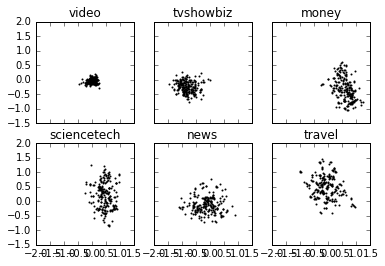

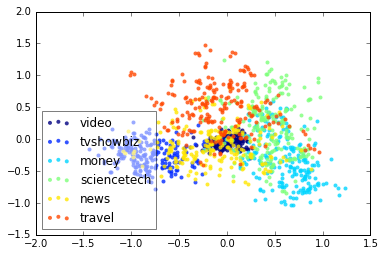

0

In [162]:
test = Experiment(template=test)
    #categorylist=['video', 'tvshowbiz', 'money', 'sciencetech', 'news', 'travel'])
test.runall()

In [134]:
all_data['category'].value_counts()

news             1072
tvshowbiz         793
video             586
money             417
sciencetech       409
travel            212
health            209
femail            196
sport             174
wires             127
property          126
debate             98
home               40
2016                7
columnists          3
_                   1
mailonsunday        1
view                1
future              1
politics            1
articles            1
entertainment       1
technology          1
business            1
magazine            1
Name: category, dtype: int64

[<matplotlib.axes._subplots.AxesSubplot object at 0x124dd3f60>, <matplotlib.axes._subplots.AxesSubplot object at 0x1233cb8d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x125ef5780>, <matplotlib.axes._subplots.AxesSubplot object at 0x121235fd0>]


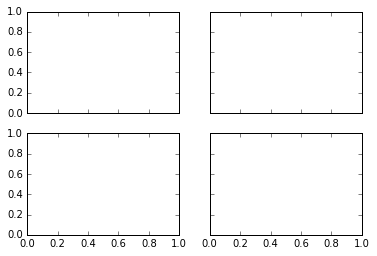

In [48]:
f, axes = plt.subplots(2,2, sharex=True, sharey=True)
print([i for j in axes for i in j])

In [1]:
gensim.popular_sites()

NameError: name 'gensim' is not defined

In [10]:
x = [i for i in all_data.publish_date if i is not None].copy()
x.sort()
print(x)

['2004-10-22 12:33:57+01:00', '2011-01-18 02:08:16+00:00', '2011-01-18 02:08:16+00:00', '2011-08-08 00:24:23+01:00', '2011-08-08 00:24:23+01:00', '2011-09-09 16:14:01+01:00', '2011-11-07 12:34:25+00:00', '2011-11-07 12:34:25+00:00', '2011-12-03 22:35:12+00:00', '2011-12-12 11:31:17+00:00', '2012-01-12 01:49:00+00:00', '2012-01-12 13:20:57+00:00', '2012-03-07 13:35:53+00:00', '2012-03-07 13:35:53+00:00', '2012-03-22 18:40:32+00:00', '2012-03-22 18:40:32+00:00', '2012-03-29 23:34:40+01:00', '2012-06-01 19:00:56+01:00', '2012-06-29 18:44:15+01:00', '2012-06-29 18:44:15+01:00', '2012-07-06 11:37:29+01:00', '2012-07-13 22:35:00+01:00', '2012-07-13 22:35:00+01:00', '2012-07-22 17:22:03+01:00', '2012-07-22 17:22:03+01:00', '2012-07-24 14:25:23+01:00', '2012-07-24 14:25:23+01:00', '2012-07-26 08:48:08+01:00', '2012-07-26 08:48:08+01:00', '2012-07-27 09:28:06+01:00', '2012-08-01 23:55:21+01:00', '2012-08-01 23:55:21+01:00', '2012-08-03 13:06:00+01:00', '2012-08-03 13:06:00+01:00', '2012-08-17 1

In [12]:
str([])

'[]'